In [12]:
from dyeles import DyeLeS
from rdkit import Chem
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import roc_curve, auc

In [6]:
data_dir = Path("../data")

coconut_df = pd.read_csv(data_dir / "processed" / "coconut.csv")
dyes_df = pd.read_csv(data_dir / "processed" / "dyes.csv")
zinc_df = pd.read_csv(data_dir / "processed" / "zinc.csv")

In [7]:
def build_validation_set(pos_df, neg_df):
    pos_df = pos_df[["smiles"]]
    neg_df = neg_df[["smiles"]]
    min_len = min(len(pos_df), len(neg_df))
    pos_df = pos_df.sample(min_len, random_state=42)
    neg_df = neg_df.sample(min_len, random_state=42)
    pos_df["label"] = 1
    neg_df["label"] = 0
    return pd.concat([pos_df, neg_df])

In [8]:
scorer = DyeLeS()
dyes_zinc_df = build_validation_set(dyes_df, zinc_df)
dyes_zinc_df["score"] = scorer(dyes_zinc_df["smiles"].tolist())

Scoring molecules: 100%|██████████| 52510/52510 [00:21<00:00, 2478.17it/s]


In [13]:
dyes_coconut_df = build_validation_set(dyes_df, coconut_df)
dyes_coconut_df["score"] = scorer(dyes_coconut_df["smiles"].tolist())

Scoring molecules: 100%|██████████| 52510/52510 [00:24<00:00, 2117.70it/s]


In [17]:
def _plot_auc_roc(y_true: list, y_pred: list, label: str, ax: plt.Axes):
    fpr, tpr, thresholds = roc_curve(y_true, y_pred)
    auc_score = auc(fpr, tpr)
    ax.plot(fpr, tpr, label=f"{label} (AUC = {auc_score:.3f})")

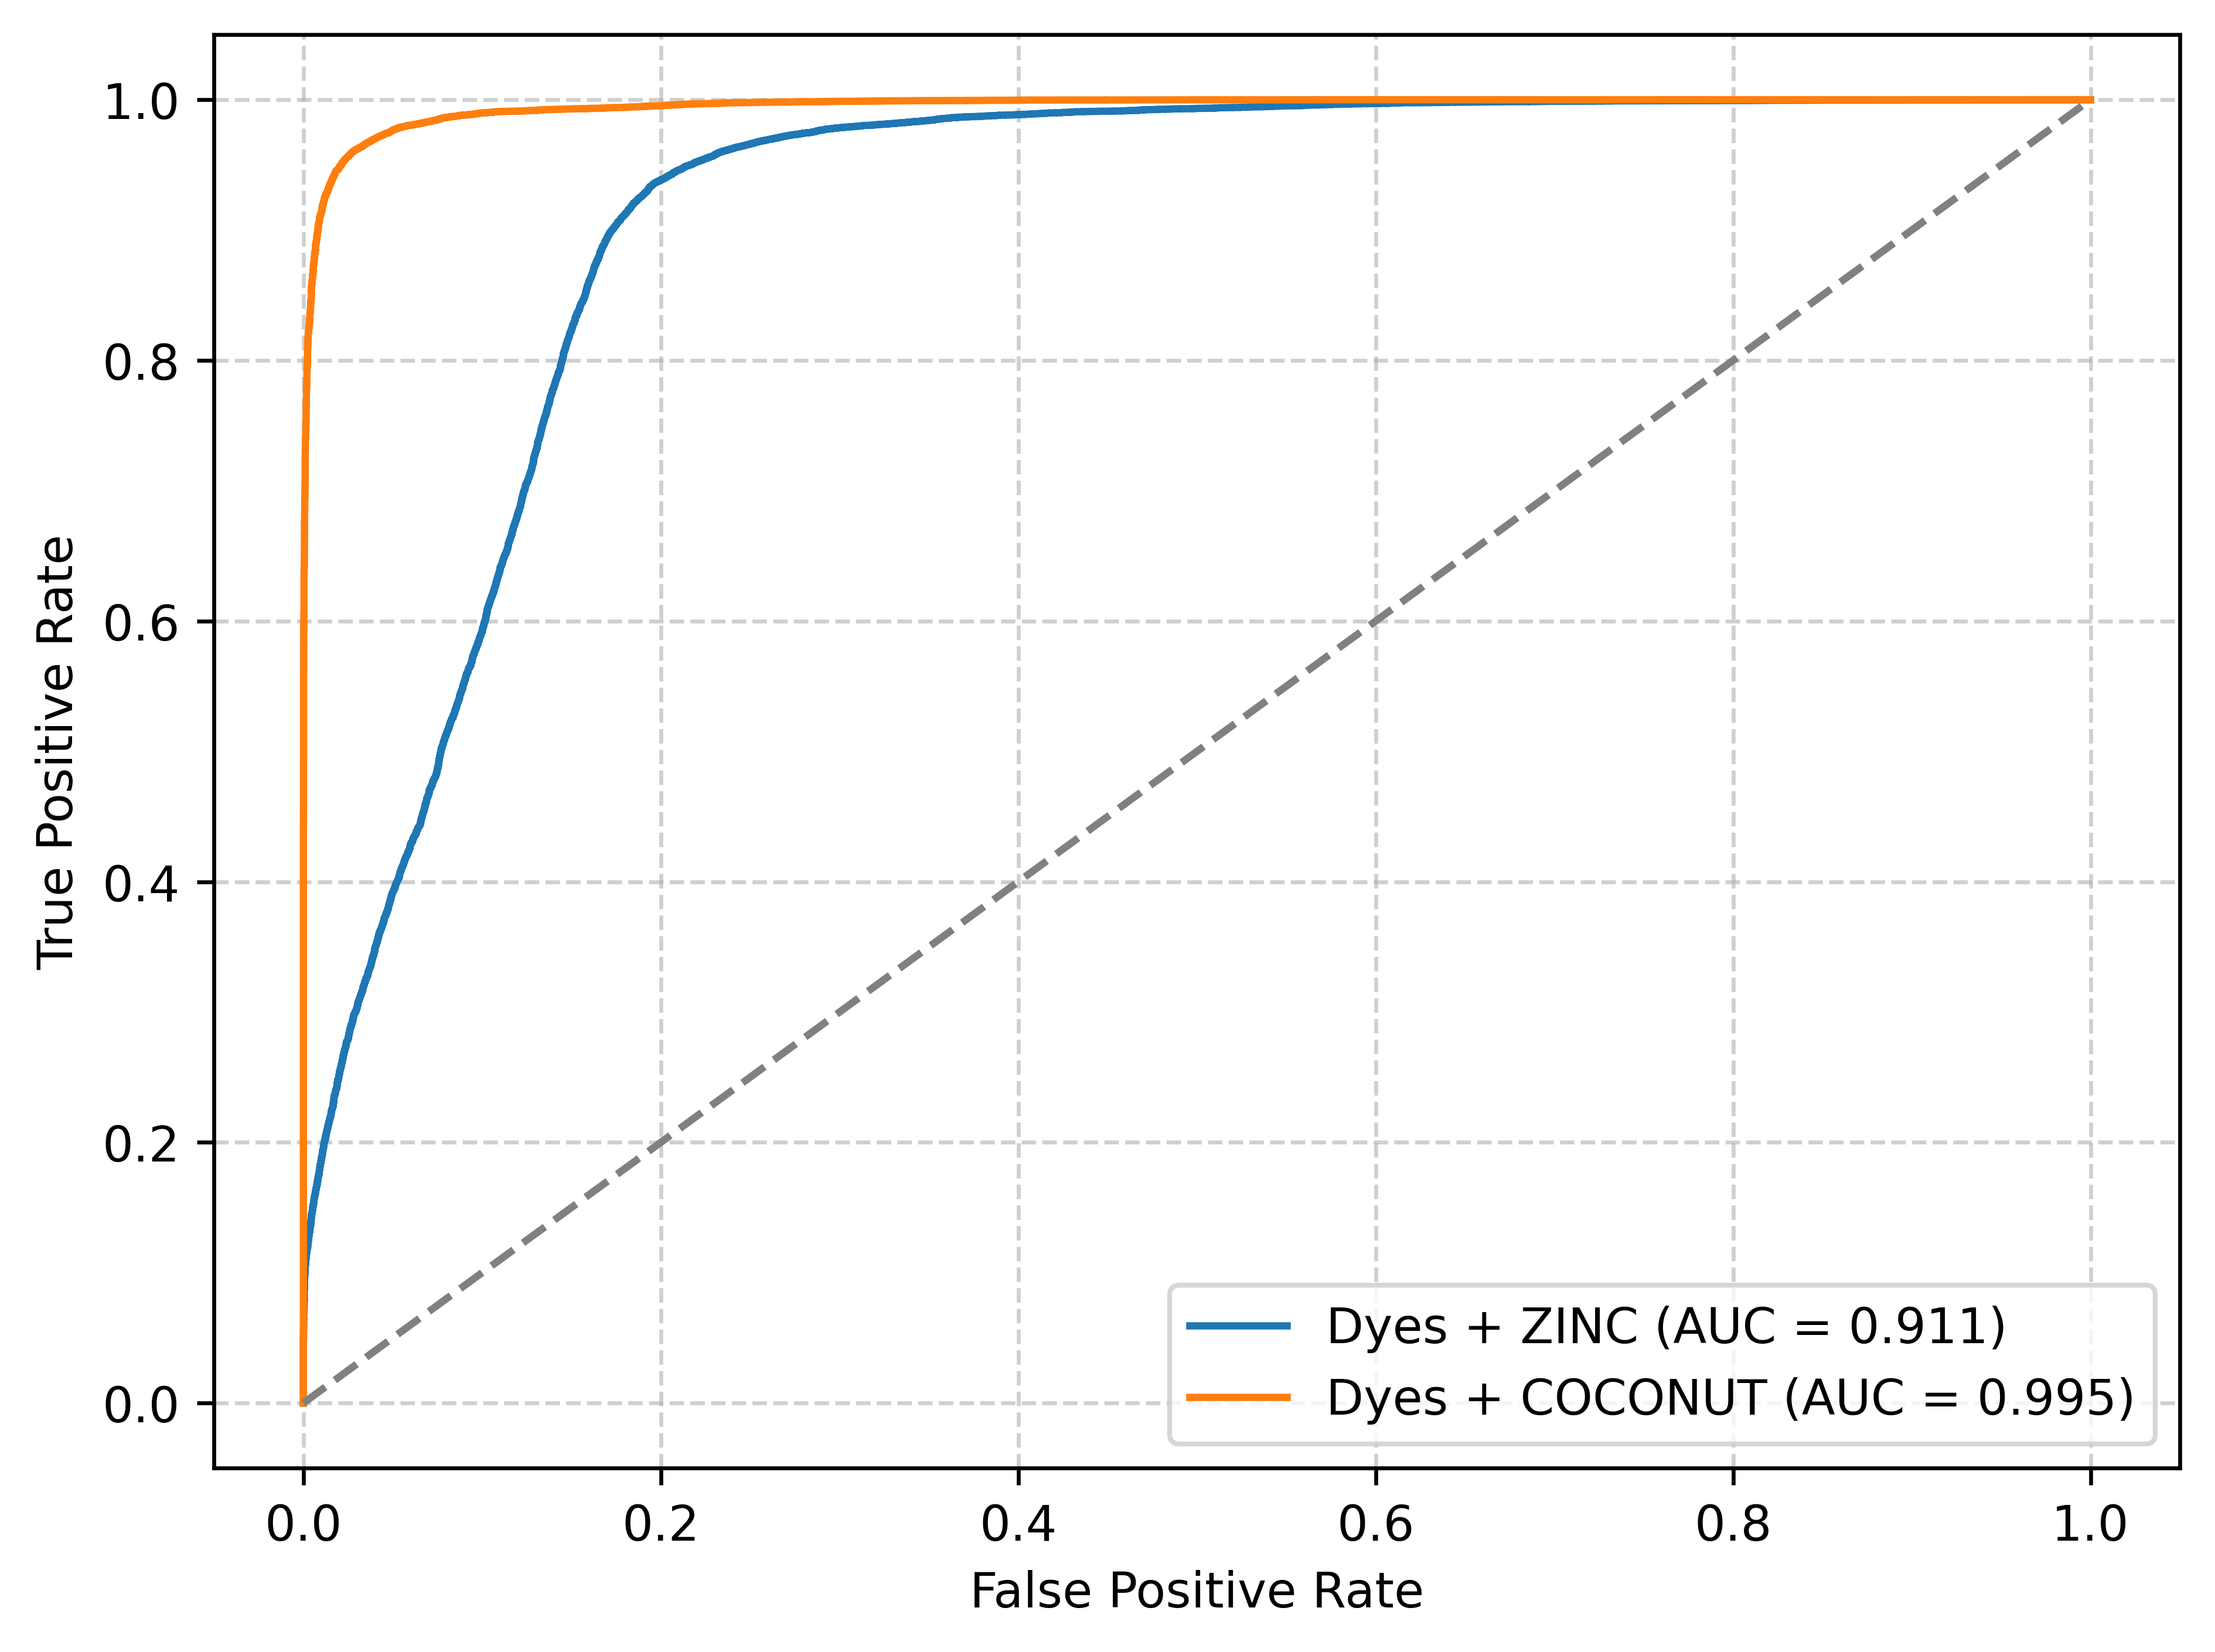

In [20]:
fig, ax = plt.subplots(dpi=600)
_plot_auc_roc(dyes_zinc_df.label.tolist(), dyes_zinc_df.score.tolist(), "Dyes + ZINC", ax)
_plot_auc_roc(dyes_coconut_df.label.tolist(), dyes_coconut_df.score.tolist(), "Dyes + COCONUT", ax)
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")  # 随机线
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

In [ ]:

    for name, preds in y_preds.items():
        # 计算fpr, tpr
        
        model_auc = auc(fpr, tpr)
        aucs[name] = model_auc

        if plot_curve:
            plt.plot(fpr, tpr, label=f"{name} (AUC = {model_auc:.3f})")

    if plot_curve:


    return aucs

In [11]:
plot_auc_roc(dyes_zinc_df["label"].tolist(), dyes_zinc_df["score"].tolist())

AttributeError: 'list' object has no attribute 'items'

<Figure size 4200x3600 with 0 Axes>

In [ ]:
def plot_auc_roc(
    y_true,
    y_preds: dict,
    plot_curve=True,
    title="ROC Curve",
    figsize=(7, 6),
    dpi=600
):
    aucs = {}

    if plot_curve:
        plt.figure(figsize=figsize, dpi=dpi)

    for name, preds in y_preds.items():
        # 计算fpr, tpr
        fpr, tpr, thresholds = roc_curve(y_true, preds)
        model_auc = auc(fpr, tpr)
        aucs[name] = model_auc

        if plot_curve:
            plt.plot(fpr, tpr, label=f"{name} (AUC = {model_auc:.3f})")

    if plot_curve:
        plt.plot([0, 1], [0, 1], linestyle="--", color="gray")  # 随机线
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title(title)
        plt.legend(loc="lower right")
        plt.grid(True, linestyle="--", alpha=0.6)
        plt.tight_layout()
        plt.show()

    return aucs

In [11]:
plot_df = dyes_zinc_df
y_true = plot_df["label"].tolist()
y_pred = plot_df["score"].tolist()


In [ ]:


# 预测1：用DyeLeS预测
dye_preds = dye_scorer(df["smiles"].tolist(), use_standardizer=True)
dye_preds = [(x + 5) / 10 for x in dye_preds]  # 归一化到0-1

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


Scoring molecules:   0%|          | 0/52510 [00:00<?, ?it/s]

Scoring molecules: 100%|██████████| 52510/52510 [00:20<00:00, 2560.72it/s]


[0.8183072985857318, 0.540819925998933, 0.5584100950005657, 0.5026171717397169, 0.5984072985570059, 0.5975632610699457, 0.5858132076946216, 0.737752761793655, 0.6605282425403737, 0.9205286219819108, 0.7848397248840187, 0.6167507827362633, 0.6392709604039919, 0.818252056526147, 0.5972067492195758, 0.547024040998705, 0.6630176699071939, 0.5788611437286273, 0.612545707091451, 0.5172240228371676, 0.7991587561461619, 0.5736722924694192, 0.8772328560223119, 0.6393295885009262, 0.5436785815790615, 0.5660640161803183, 0.5965549299615748, 0.6869692110268668, 0.5827280137799875, 0.6223336995380377, 0.696662007387898, 0.537429571360659, 0.539569830813693, 0.6851166234710379, 0.6680202980326531, 0.7621971246219121, 0.6918010140122204, 0.6678189930161085, 0.7119415249710487, 0.6208007612648839, 0.5614827310380818, 0.841311352761298, 0.747620107041987, 0.5906618213501825, 0.6185771882400439, 0.5950810353785706, 0.5977528133620071, 0.6240676959725147, 0.8776683506934184, 0.536368708808166, 0.59828686

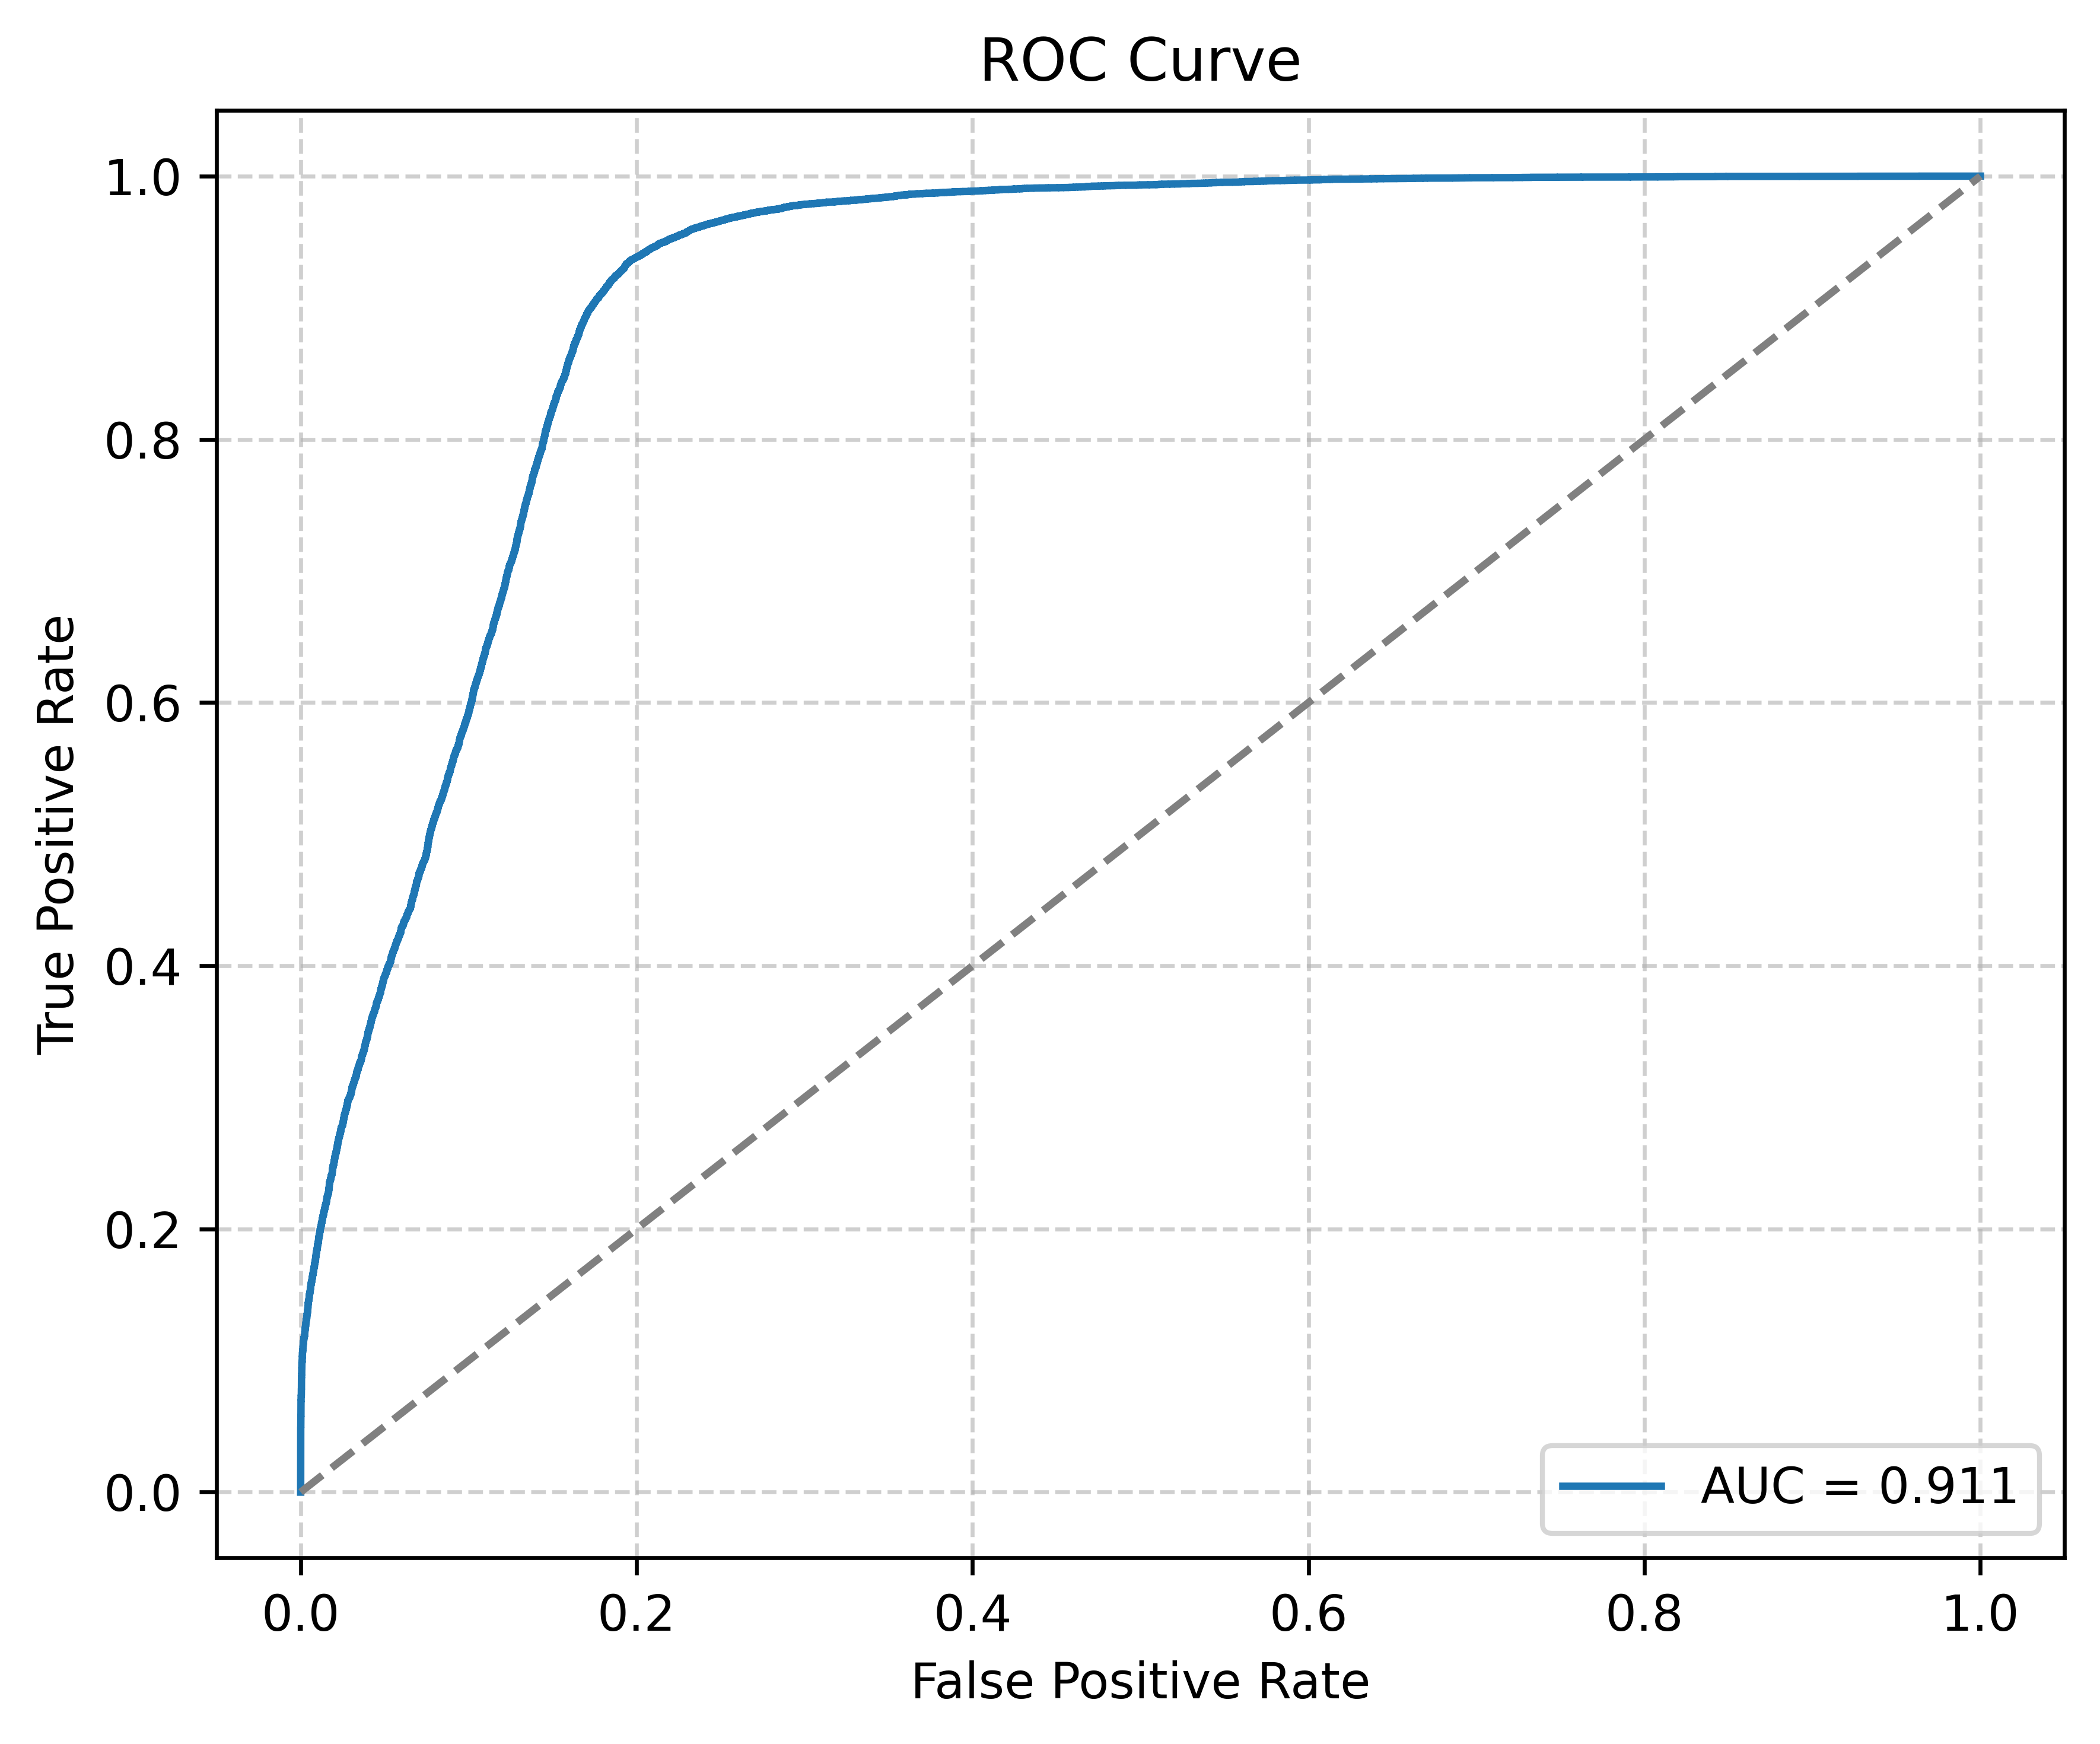

0.9111376407667777

In [12]:
plot_auc_roc(dyes_zinc_df)

Scoring molecules: 100%|██████████| 52510/52510 [00:24<00:00, 2171.65it/s]


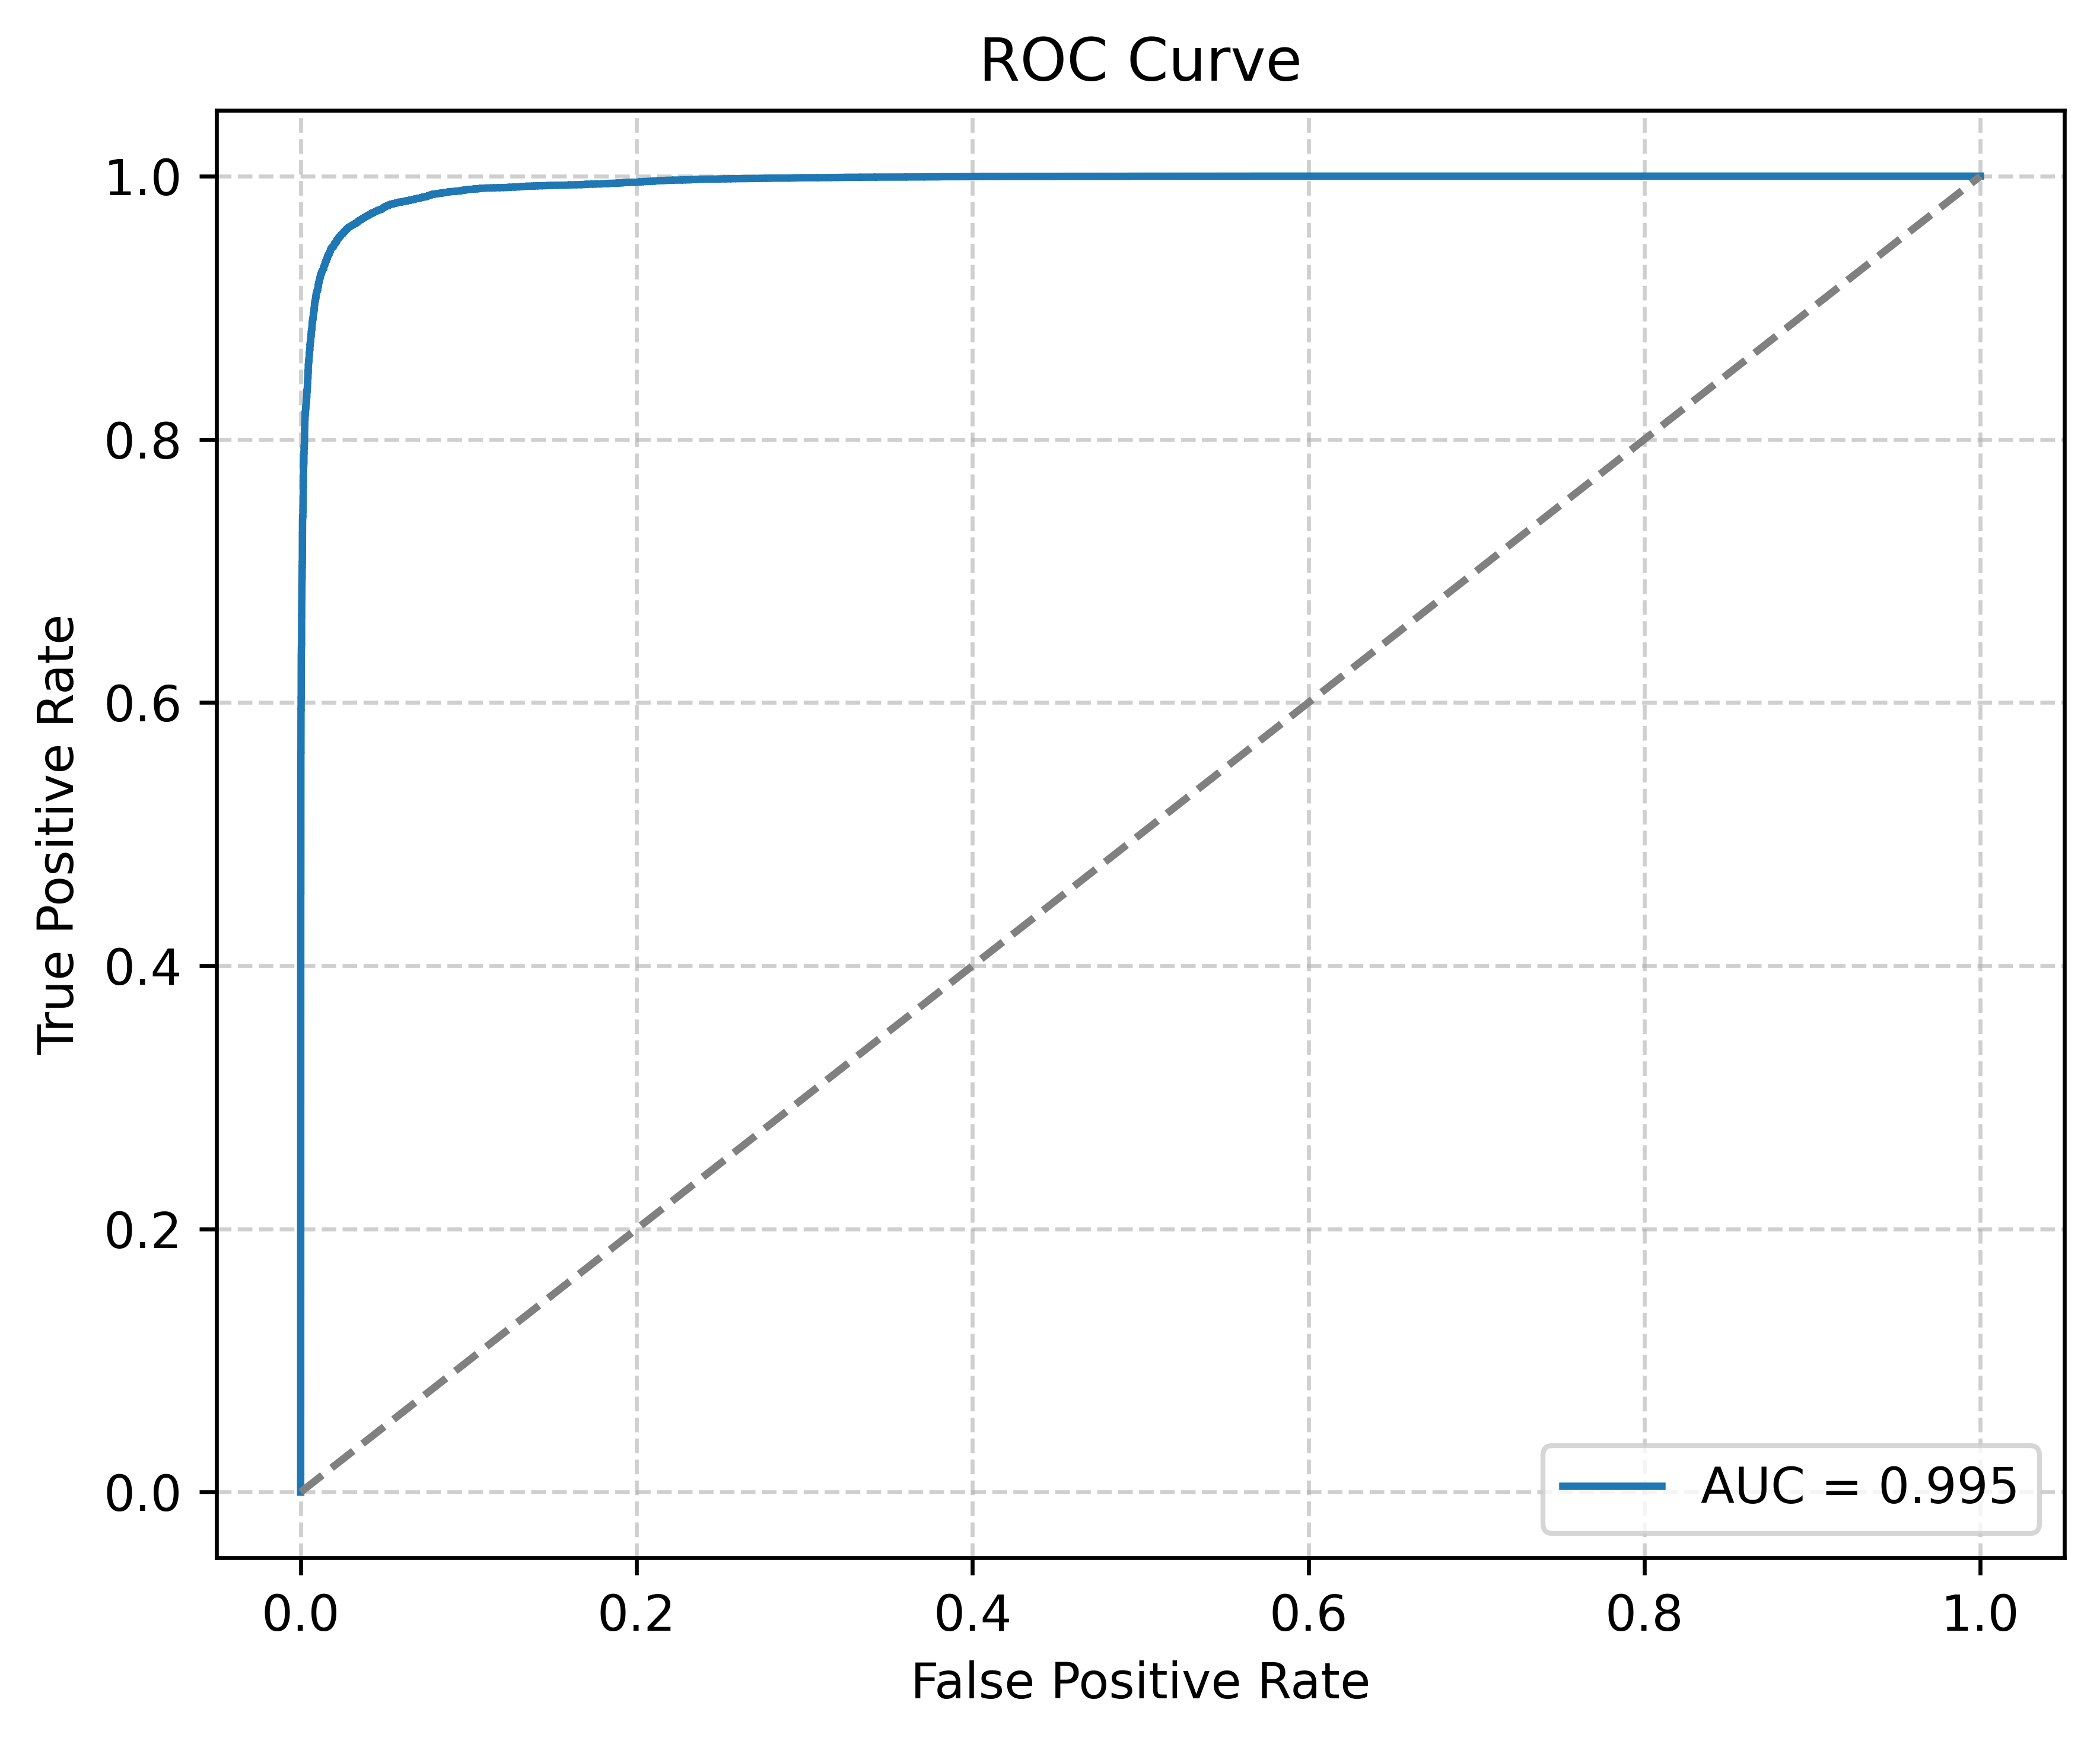

0.9948149097009789

In [10]:
plot_auc_roc(dyes_coconut_df)